# A Whale off the Port(folio)
---

In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, andmutual fund portfolios and compare them against the S&P 500 Index.

In [322]:
# Initial Imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [22]:
# Reading whale returns
path = "C:/Users/bmccr/smu-virt-fin-pt-04-2021-u-c/smu-virt-fin-pt-04-2021-u-c/04-Pandas/Pandas Homework/Starter_Code/Resources/"
whale_df = pd.read_csv(path + "whale_returns.csv")
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [23]:
whale_df.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [24]:
# Convert date object to datetime
whale_df["Date"] = pd.to_datetime(whale_df["Date"])

In [25]:
whale_df.dtypes

Date                           datetime64[ns]
SOROS FUND MANAGEMENT LLC             float64
PAULSON & CO.INC.                     float64
TIGER GLOBAL MANAGEMENT LLC           float64
BERKSHIRE HATHAWAY INC                float64
dtype: object

In [13]:
whale_df.shape

(1060, 5)

In [14]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [15]:
# Drop nulls
whale_df.dropna(inplace = True)

In [16]:
whale_df.shape

(1059, 5)

In [44]:
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [158]:
# Reading algorithmic returns
algo_df = pd.read_csv(path + "algo_returns.csv")
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [159]:
algo_df.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [160]:
# Convert date object to datetime
algo_df["Date"] = pd.to_datetime(algo_df["Date"])

In [161]:
algo_df.dtypes

Date      datetime64[ns]
Algo 1           float64
Algo 2           float64
dtype: object

In [162]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [163]:
algo_df.shape

(1241, 3)

In [164]:
# Drop nulls
algo_df.dropna(inplace = True)

In [165]:
algo_df.shape

(1235, 3)

In [166]:
algo_df.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [187]:
# Reading S&P 500 Closing Prices
sp_df = pd.read_csv(path + "sp500_history.csv")
sp_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [188]:
# Data is in reverse date order compared to other dataframes, so we will reverse the order to match others (ascending)
sp_df = sp_df[::-1]
sp_df.head()

,Date,Close
1648,1-Oct-12,$1444.49
1647,2-Oct-12,$1445.75
1646,3-Oct-12,$1450.99
1645,4-Oct-12,$1461.40
1644,5-Oct-12,$1460.93


In [189]:
# Check data types
sp_df.dtypes

Date     object
Close    object
dtype: object

In [190]:
# Fix Data Types
sp_df["Date"] = pd.to_datetime(sp_df["Date"])

In [191]:
sp_df.dtypes

Date     datetime64[ns]
Close            object
dtype: object

In [192]:
# Clean data by removing $ signs
sp_df["Close"] = sp_df["Close"].str.replace("$" , "")
sp_df.head()

,Date,Close
1648,2012-10-01,1444.49
1647,2012-10-02,1445.75
1646,2012-10-03,1450.99
1645,2012-10-04,1461.40
1644,2012-10-05,1460.93


In [193]:
# Clean data by changing close object to float
sp_df["Close"] = pd.to_numeric(sp_df["Close"])

In [194]:
sp_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [195]:
# Calculate Daily Returns (change close from price to percentage change)
sp_df["Close"] = sp_df["Close"].pct_change()

In [196]:
sp_df.head()

,Date,Close
1648,2012-10-01,NaN
1647,2012-10-02,0.000872
1646,2012-10-03,0.003624
1645,2012-10-04,0.007174
1644,2012-10-05,-0.000322


In [197]:
# Count nulls
sp_df.isnull().sum()

Date     0
Close    1
dtype: int64

In [198]:
sp_df.shape

(1649, 2)

In [199]:
# Drop nulls
sp_df.dropna(inplace = True)

In [200]:
sp_df.shape

(1648, 2)

In [201]:
# Rename `Close` column to be specific to this portfolio (not to be confused with close values from other dataframes)
sp_df["S&P500"] = sp_df["Close"]
sp_df.head()

,Date,Close,S&P500
1647,2012-10-02,0.000872,0.000872
1646,2012-10-03,0.003624,0.003624
1645,2012-10-04,0.007174,0.007174
1644,2012-10-05,-0.000322,-0.000322
1643,2012-10-08,-0.003457,-0.003457


In [202]:
# Remove `Close` column since we just added that column under a new name (S&P500)
del sp_df["Close"]
sp_df.head()

,Date,S&P500
1647,2012-10-02,0.000872
1646,2012-10-03,0.003624
1645,2012-10-04,0.007174
1644,2012-10-05,-0.000322
1643,2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P500 Returns

In [203]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whale_algo_df = pd.merge(left = whale_df, right = algo_df, how = "inner")
whale_algo_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
0,2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
3,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460


In [204]:
# Since you can only merge 2 dataframes at a time, add the 3rd (S&P500) dataframe
combined_df = pd.merge(left = whale_algo_df, right = sp_df, how = "inner")
combined_df.set_index("Date", inplace = True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis
#### Calculate and Plot the daily returns

<AxesSubplot:xlabel='Date'>

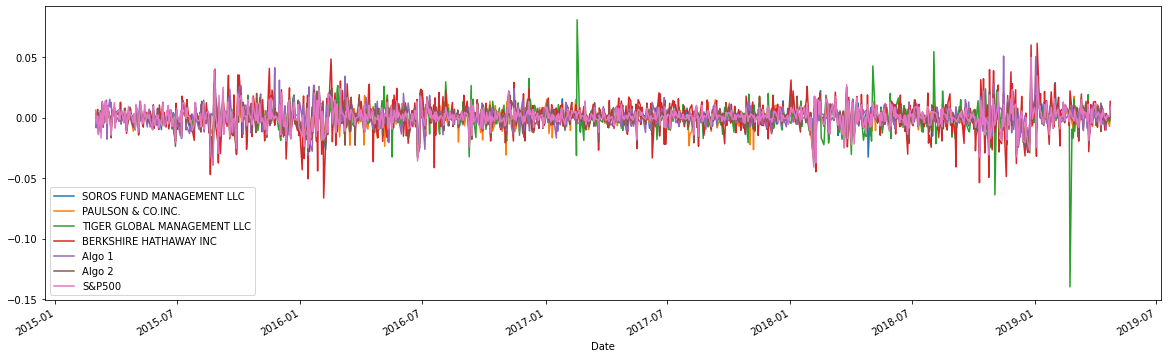

In [255]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (20,6))

#### Calculate and Plot cumulative returns

In [245]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,0.991842,1.003200,1.006125
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.989916,1.002247,1.001559
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.981414,1.004669,0.997163
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.980476,1.009012,0.998356
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.975616,0.997449,0.984205


<AxesSubplot:xlabel='Date'>

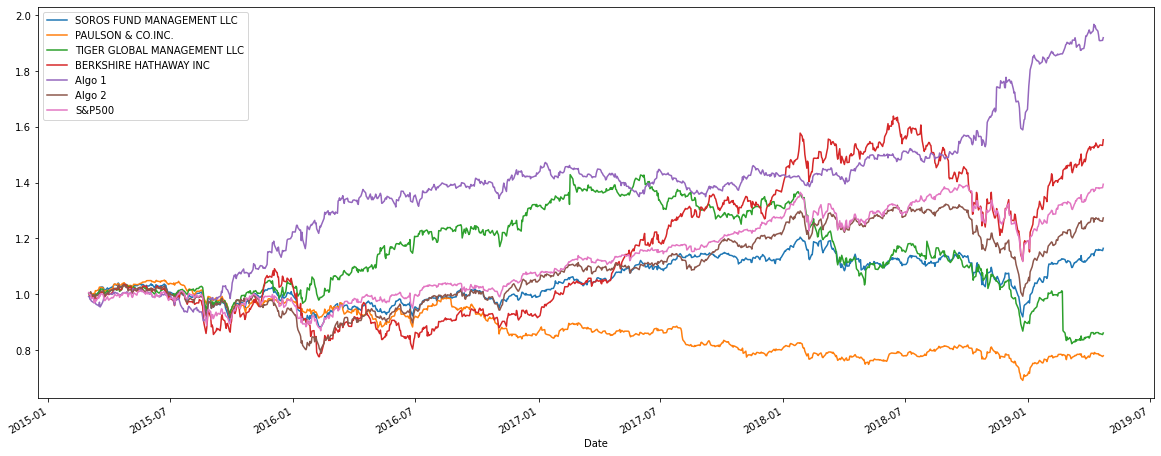

In [252]:
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,8))

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio.
2. Calculate the standard deviation for all portfolios.
3. Determine which portfolios are riskier than the S&P 500.
4. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio

<AxesSubplot:>

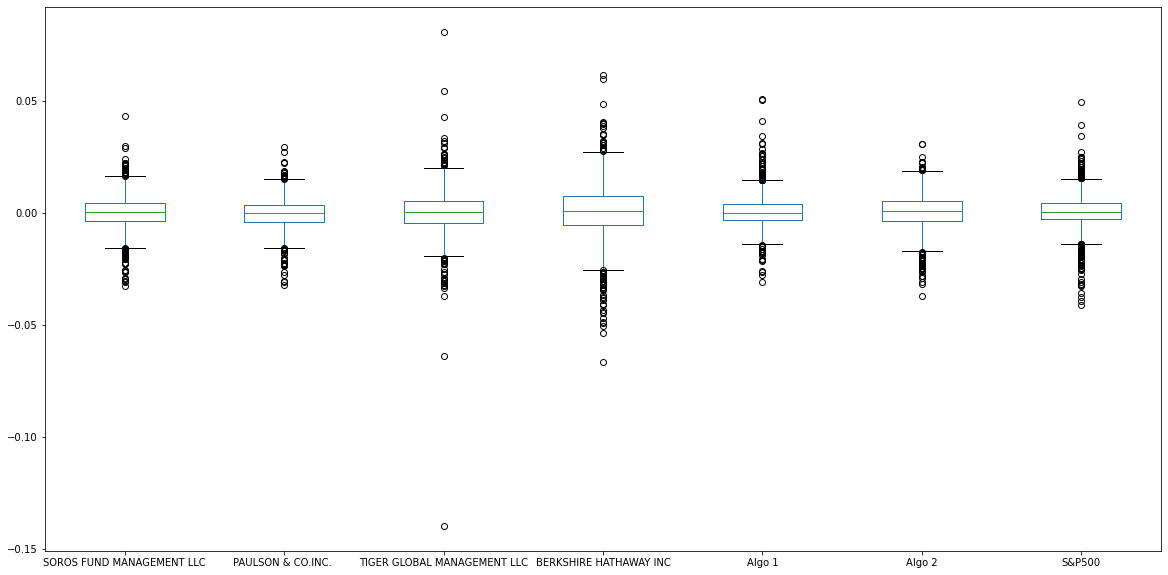

In [257]:
# Box plot to visually show risk
combined_df.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviation

In [277]:
# Calculate the daily standard deviation of all portfolios
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
Algo 2                         0.008339
S&P500                         0.008551
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [284]:
# Calculate the daily standard deviation of the S&P 500
sp_std = combined_df["S&P500"].std()
sp_std

0.008551498507779677

In [294]:
# Determine which portfolios are riskier than the S&P 500

riskier = []

for x,y in combined_std.iteritems():
    if y > sp_std:
        riskier.append({x})
print(f"The following portfolios are RISKIER than the S&P500: {riskier}")

The following portfolios are RISKIER than the S&P500: [{'TIGER GLOBAL MANAGEMENT LLC'}, {'BERKSHIRE HATHAWAY INC'}]


### Calculate the Annualized Standard Deviation

In [309]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.groupby(combined_df.index.year).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015,0.007922,0.005959,0.008443,0.012681,0.008921,0.008634,0.009922
2016,0.007988,0.008246,0.010295,0.014039,0.008366,0.009676,0.008249
2017,0.004942,0.005935,0.008290,0.008566,0.005220,0.005431,0.004212
2018,0.009965,0.007484,0.012484,0.015265,0.007548,0.009056,0.010742
2019,0.007434,0.007104,0.018166,0.012797,0.007980,0.007811,0.007835


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta.

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P500.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P500.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [311]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_df = combined_df.rolling(window = 21).std()
rolling_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.006094
2019-04-23,0.004315,0.005695,0.004949,0.006602,0.005889,0.005582,0.004325


<AxesSubplot:xlabel='Date'>

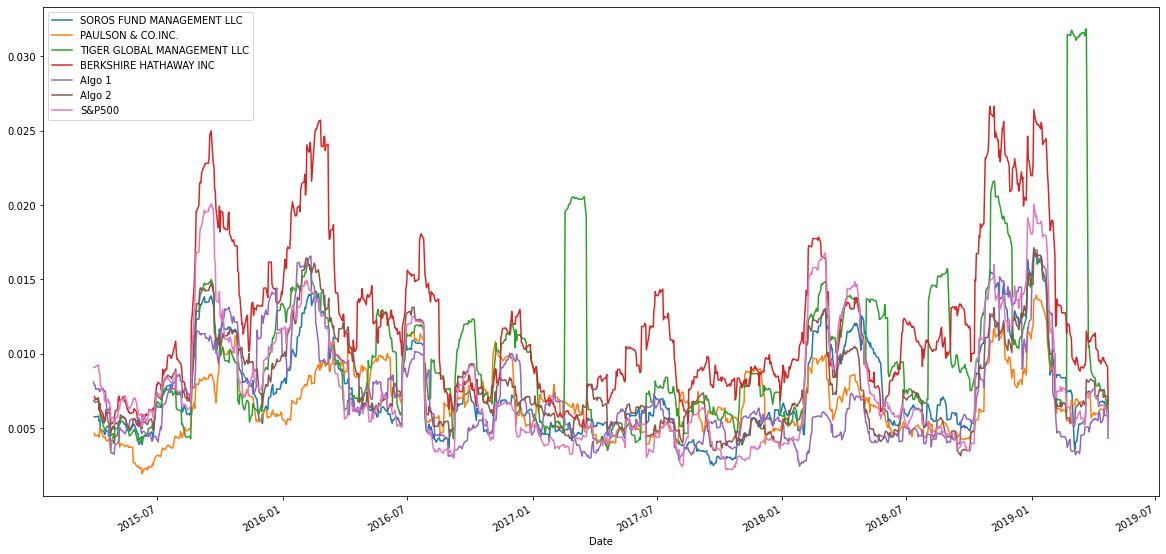

In [316]:
rolling_df.plot(figsize = (20,10))

### Calculate and plot the correlation

In [323]:
# Calculate the correlation
correlation = combined_df.corr()

<AxesSubplot:>

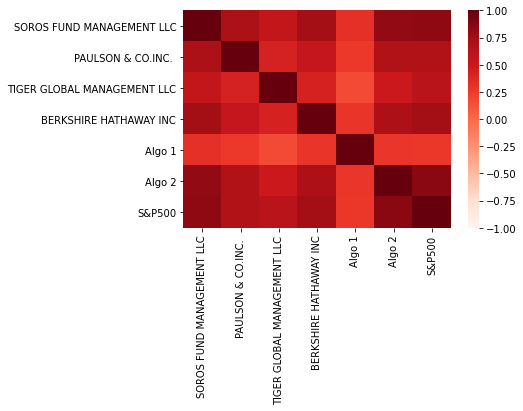

In [325]:
# Display the correlation matrix
sns.heatmap(correlation, cmap = "Reds", vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [339]:
# Calculate covariance of a single portfolio
covariance = combined_df["Algo 1"].rolling(window = 60).cov(combined_df["S&P500"])
covariance.tail()

Date
2019-04-16    0.000001
2019-04-17    0.000003
2019-04-18    0.000003
2019-04-22    0.000003
2019-04-23    0.000003
dtype: float64

In [340]:
# Calculate variance of S&P 500
variance = combined_df["S&P500"].rolling(window = 60).var()
variance.tail()

Date
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P500, dtype: float64

In [344]:
# Computing beta
algo_1_beta = covariance / variance
algo_1_beta.tail()

Date
2019-04-16    0.025920
2019-04-17    0.072232
2019-04-18    0.069934
2019-04-22    0.069525
2019-04-23    0.084337
dtype: float64

<AxesSubplot:xlabel='Date'>

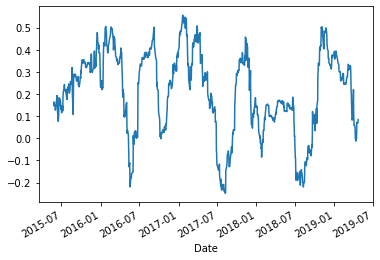

In [347]:
# Plot beta trend
algo_1_beta.plot(figsize())